In [3]:
!pip install xclim==0.45.0;
!pip install netCDF4;
import xclim
from drought_index import DroughtIndicator
import importlib
import os, sys, glob
from datetime import datetime

import numpy as np
import pandas as pd
import xarray as xr

import s3fs
import netCDF4 as nc
import zarr
from datetime import datetime
import time
import os, sys
import itertools
import numpy as np
import pandas as pd
import xarray as xr
import s3fs
import xclim
import netCDF4 as nc

sys.path.append(r"/opt/app-root/src/hazard/src")
from hazard.sources.nex_gddp_cmip6 import NexGddpCmip6

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
from dotenv import load_dotenv,dotenv_values
load_dotenv("/opt/app-root/src/hazard/credentials-dev.env",override=True)
HAZARD_INDICATORS_S3_ACCESS_KEY:str = os.getenv("HAZARD_INDICATORS_S3_ACCESS_KEY")
HAZARD_INDICATORS_S3_SECRET_KEY:str = os.getenv("HAZARD_INDICATORS_S3_SECRET_KEY")
s3_bucket:str = os.getenv("s3_bucket")
s3_group_path=s3_bucket+"/drought/osc/v01"
s3_group_path

'physrisk-hazard-indicators-dev01/drought/osc/v01'

In [5]:
s3 = s3fs.S3FileSystem(anon=False, key=HAZARD_INDICATORS_S3_ACCESS_KEY, secret=HAZARD_INDICATORS_S3_SECRET_KEY)
fs_CIMP6 = s3fs.S3FileSystem(anon=True)
datasource = NexGddpCmip6()

In [4]:
#importlib.reload(drought_index)
# check this!

In [6]:
# MPI-ESM1-2-LR
# MIROC6
# NorESM2-MM
model = DroughtIndicator(gcm = "MIROC6",scenario = "ssp585", s3=s3,s3_group_path=s3_group_path)
model.pre_chunk()
model.run_single()

Chunk = Chunk_0000 ... previously calculated ... (0.17sec)
Chunk = Chunk_0001 ... previously calculated ... (0.04sec)
Chunk = Chunk_0002 ... previously calculated ... (0.03sec)
Chunk = Chunk_0003 ... previously calculated ... (0.07sec)
Chunk = Chunk_0004 ... previously calculated ... (0.04sec)
Chunk = Chunk_0005 ... previously calculated ... (0.03sec)
Chunk = Chunk_0006 ... previously calculated ... (0.03sec)
Chunk = Chunk_0007 ... previously calculated ... (0.03sec)
Chunk = Chunk_0008 ... previously calculated ... (0.03sec)
Chunk = Chunk_0009 ... previously calculated ... (0.03sec)
Chunk = Chunk_0010 ... previously calculated ... (0.04sec)
Chunk = Chunk_0011 ... previously calculated ... (0.03sec)
Chunk = Chunk_0012 ... previously calculated ... (0.03sec)
Chunk = Chunk_0013 ... previously calculated ... (0.03sec)
Chunk = Chunk_0014 ... previously calculated ... (0.03sec)
Chunk = Chunk_0015 ... previously calculated ... (0.03sec)
Chunk = Chunk_0016 ... previously calculated ... (0.03se

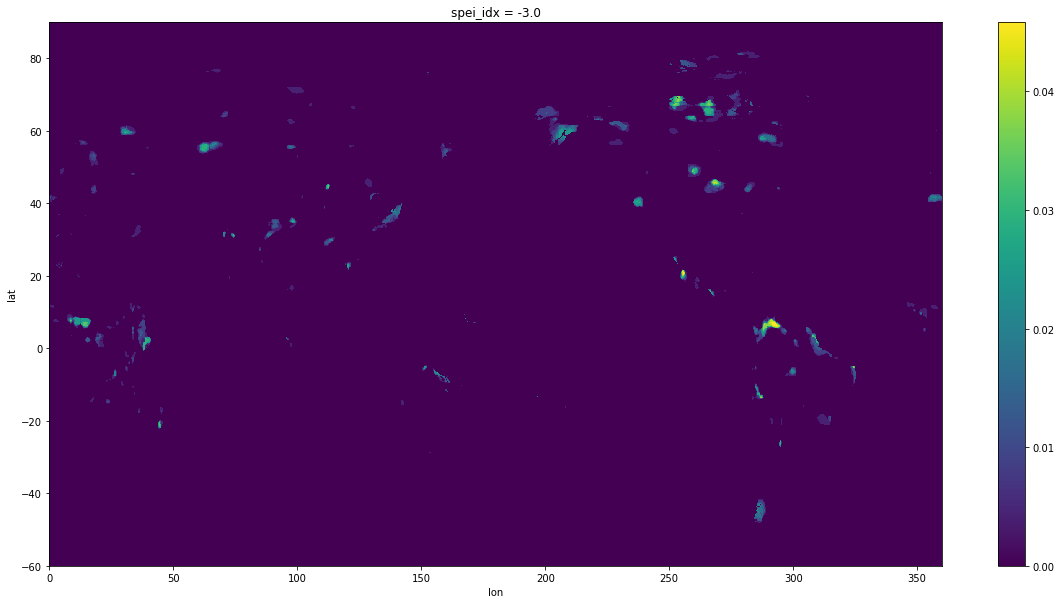

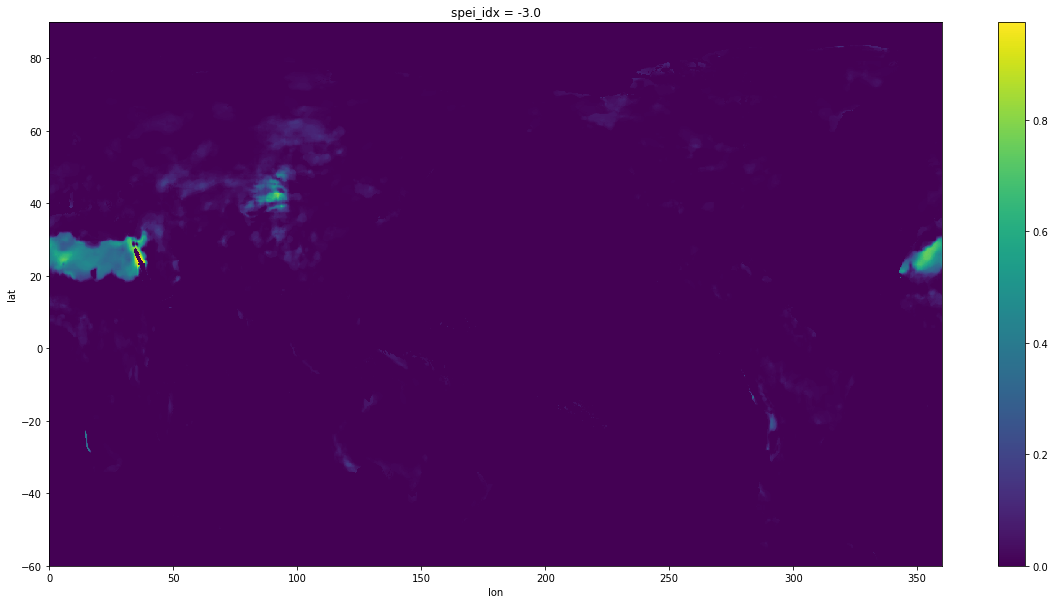

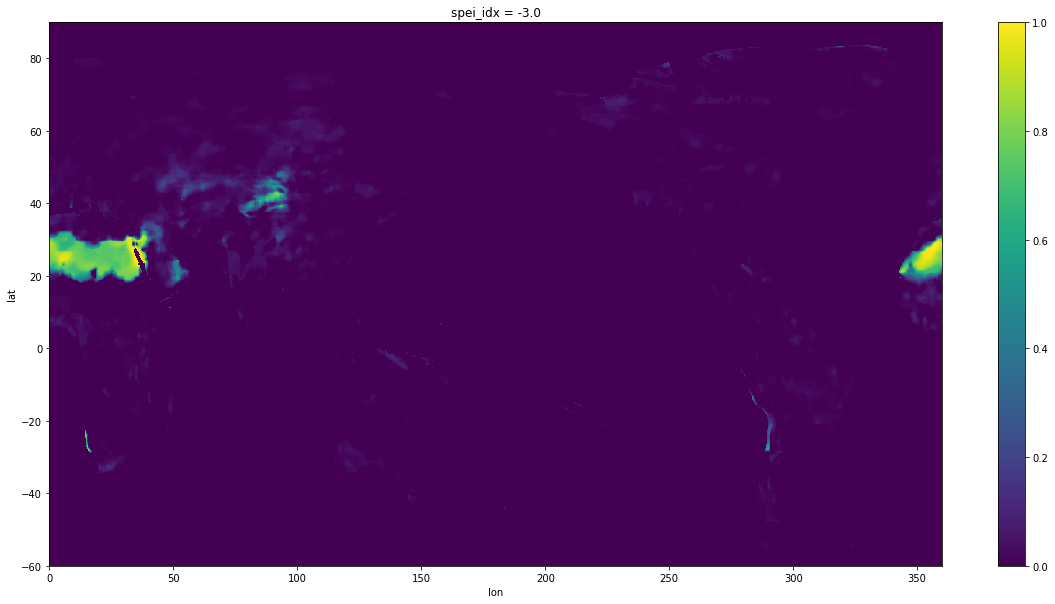

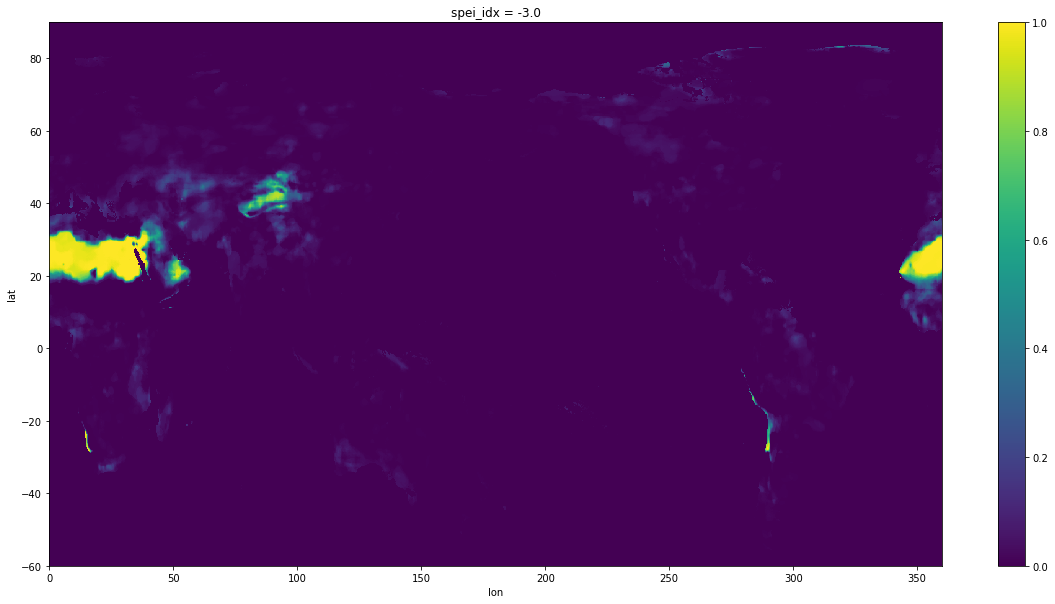

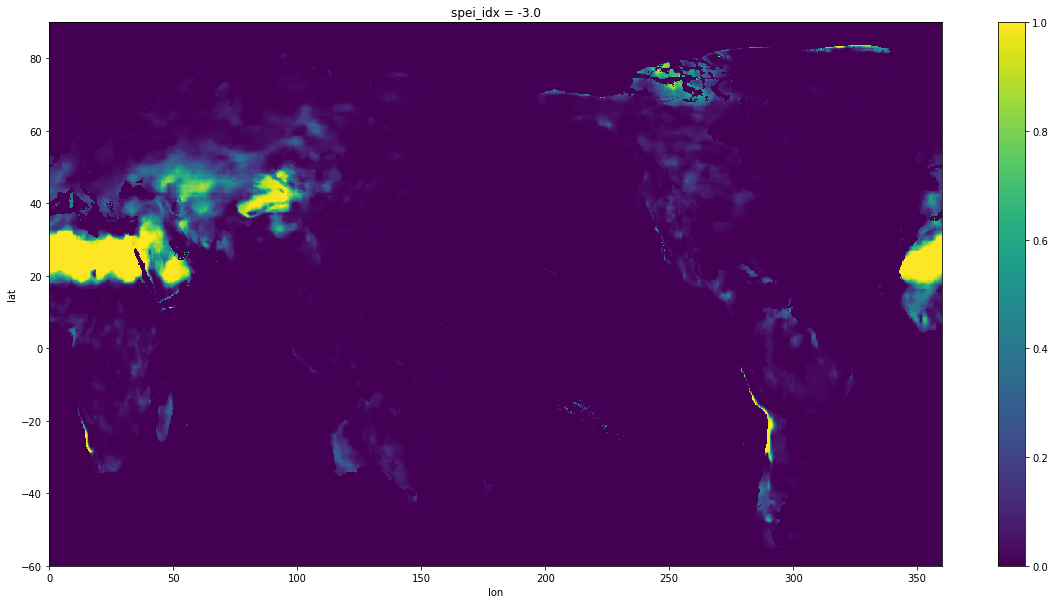

In [9]:
model.months_spei12m_below_set['MIROC6_ssp585_2005'].sel(spei_idx=-3).plot(figsize=[20,10])
model.months_spei12m_below_set['MIROC6_ssp585_2030'].sel(spei_idx=-3).plot(figsize=[20,10])
model.months_spei12m_below_set['MIROC6_ssp585_2040'].sel(spei_idx=-3).plot(figsize=[20,10])
model.months_spei12m_below_set['MIROC6_ssp585_2050'].sel(spei_idx=-3).plot(figsize=[20,10])
model.months_spei12m_below_set['MIROC6_ssp585_2080'].sel(spei_idx=-3).plot(figsize=[20,10])

In [8]:
#calib start 1985??
#xclim pipenv
vars(model)

{'gcm': 'MIROC6',
 'scenario': 'ssp585',
 's3': <s3fs.core.S3FileSystem at 0x7f83885a74f0>,
 's3_group_path': 'physrisk-hazard-indicators-dev01/drought/osc/v01',
 'months_spei12m_below_set': {'MIROC6_ssp585_2005': <xarray.DataArray (spei_idx: 7, lat: 600, lon: 1440)>
  array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
  ...
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
  